q2.  
 https://leetcode.com/problems/stone-game-ii/description/  
no above conditiions  
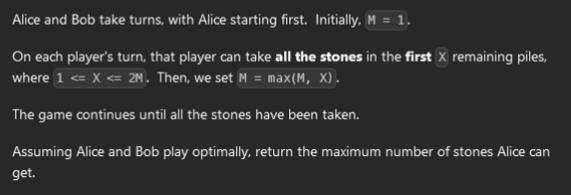


In [ ]:
//Every times stones are taken from front
int f(int idx, int m, vector<int> &v){
    if(idx>=v.size()) return 0;
    int tot=0;
    int ans=INT_MIN;
    for(int i=0;i<2*m;i++){
        if(idx+i<v.size()) tot+=v[idx+i];
        ans=max(ans,tot-f(idx+i+1,max(m,i+1),v));
    }
    return ans;
}

int stoneGameII(vector<int>& v) {
    int sum=accumulate(v.begin(),v.end(),0);//A+B
    int diff=f(0,1,v);//A-B-> We will maximize it
    //No. of stones with Alice
    return (sum+diff)/2;
}

In [ ]:
class Solution {
    public:
    
    
    //Every times stones are taken from front
    int f(int idx, int m, vector<int> &v, vector<vector<int>> &mem){
        if(idx>=v.size()) return 0;
        if(mem[idx][m]!=-1) return mem[idx][m];
        int tot=0;
        int ans=INT_MIN;
        for(int i=0;i<2*m;i++){
            if(idx+i<v.size()) tot+=v[idx+i];
            ans=max(ans,tot-f(idx+i+1,max(m,i+1),v,mem));
        }
        return mem[idx][m]=ans;
    }
    
    int stoneGameII(vector<int>& v) {
        vector<vector<int>> mem(101,vector<int>(201,-1));
        int sum=accumulate(v.begin(),v.end(),0);//A+B
        int diff=f(0,1,v,mem);//A-B-> We will maximize it
        //No. of stones with Alice
        return (sum+diff)/2;
    }
    };

In [ ]:
class Solution {
    public:
        int stoneGameII(vector<int>& v) {
            int n = v.size();
            vector<vector<int>> dp(n + 1, vector<int>(2 * n + 1, 0));
            vector<int> suffixSum(n + 1, 0);
    
            for (int i = n - 1; i >= 0; i--) {
                suffixSum[i] = suffixSum[i + 1] + v[i];
            }
    
            for (int idx = n - 1; idx >= 0; idx--) {
                for (int m = 1; m <= n; m++) {
                    int ans = INT_MIN;
                    for (int i = 0; i < 2 * m && idx + i < n; i++) {
                        ans = max(ans, suffixSum[idx] - dp[idx + i + 1][max(m, i + 1)]);
                    }
                    dp[idx][m] = ans;
                }
            }
            return dp[0][1];
        }
    };

q3.   
https://leetcode.com/problems/stone-game-iii/description/
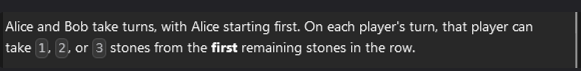

In [ ]:
int f(vector<int> &v, int idxm, int n){
    if(idx>=n) return 0;
    int ans=v[idx]-f(v,idx+1);
    if(idx+1<n) ans=max(ans,v[idx]+v[idx+1]-f(v,idx+2));
    if(idx+2<n) ans=max(ans,v[idx]+v[idx+1]+v[idx+2]-f(v,idx+3));
    return ans;
}

string stoneGameIII(vector<int>& v) {
    int n=v.size();
    int diff=f(v,0,n);
    if(diff>0) return "Alice";
    else if(diff==0) return "Tie";
    else return "Bob";
}

we find overlap  
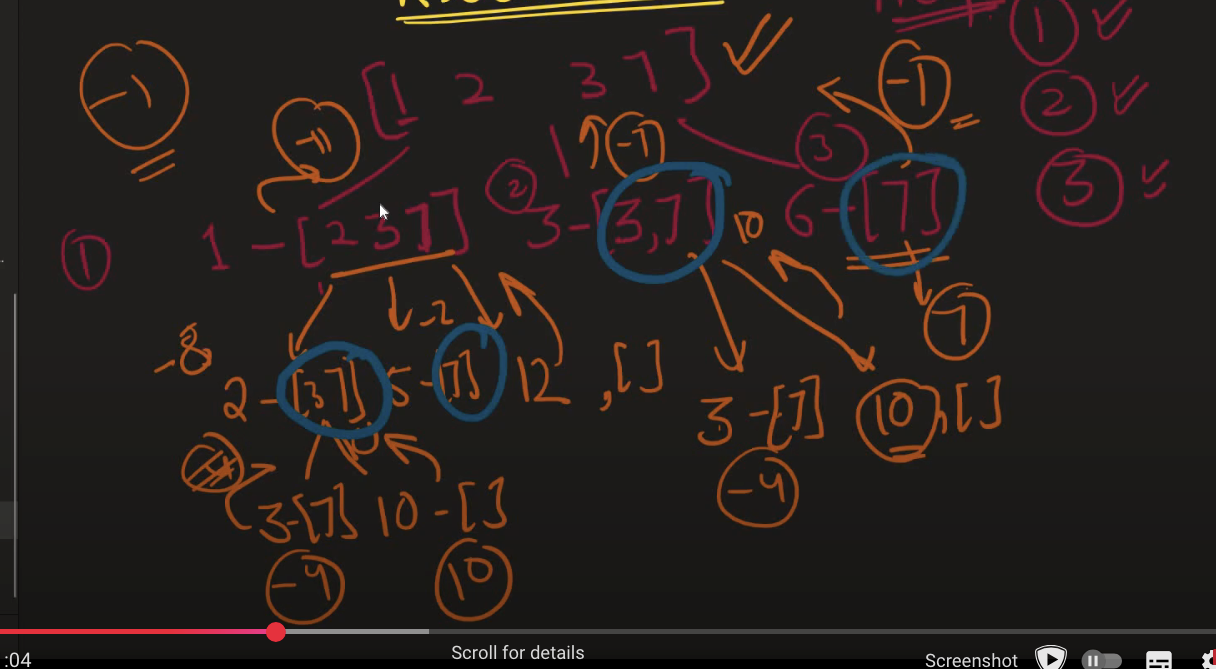

In [ ]:
class Solution {
    public:
    
        string stoneGameIII(vector<int>& v) {
            int n=v.size();
            vector<int> dp(n+3, 0);
            for(int i=n-1;i>=0;i--){
                dp[i] = INT_MIN;
                dp[i] = max(dp[i], -dp[i+1]+(v[i]));
                if(i+1<n) dp[i] = max(dp[i], -dp[i+2]+(v[i] + v[i+1]));
                if(i+2<n) dp[i] = max(dp[i], -dp[i+3]+(v[i] + v[i+1] + v[i+2]));
            }
    
            if(dp[0]>0) return "Alice";;
            if(dp[0]==0) return "Tie";
             return "Bob";
    
        }
    };

q4.  
https://leetcode.com/problems/stone-game-iv/description/  
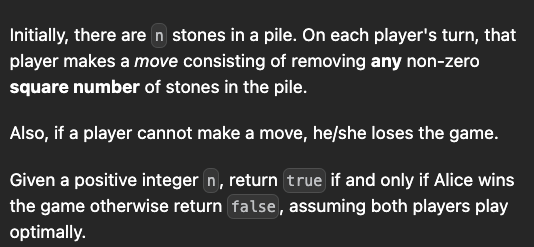 

In [ ]:
class Solution {
    public:
        bool f(int x){
            if(x<=0) return 0;
            for(int i=1;i*i<=x;i++){
                if(f(x-i*i)==0) return 1;
            }
            return 0;
        }
    
        bool winnerSquareGame(int n) {
            return f(n);
        }
    };

In [ ]:
class Solution {
    public:
        bool winnerSquareGame(int n) {
            vector<bool> dp(n+1);
            for(int i=1;i<=n;i++){
                for(int j=1;j*j<=i;j++){
                    if(!dp[i-j*j]){
                        dp[i]=1;
                    }
                }
            }
            return dp[n];
        }
    };